__**Environmental Data Example - Climate Change & Earth Surface Temperature Visualisation**__

This code will give an example of how environmental data can be extracted an analysed from a dataset and will show a breakdown of some of the useful techniques/codes for the visualisation of data - Using data gathered within the Lawrence Berkeley National Laboratory in accordance with The Berkeley Earth Surface Temperature Study.

__**Initial Conditions/Setting Up Of The Dataset**__

In [1]:
# Imports data analysis libraries, (numpy for numerical computations and pandas to read the dataset/.csv files)

import numpy as np 
import pandas as pd

In [2]:
# Imports visualisation libraries, (matplot.lib and seaborn for graphical and statistical analysis )

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time

In [3]:
# Allows warnings to be ignored 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Imports the data for global temperatures by country 

globaltempbycountry = pd.read_csv("climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")

In [5]:
# Shows the whole dataset 

globaltempbycountry

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [6]:
# Gives a list of all the different column headings/variables within the dataset

globaltempbycountry.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [7]:
# Shows an example of 5 rows within the whole dataset

globaltempbycountry.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
462647,1947-06-01,19.524,0.321,Serbia
182806,1884-11-01,5.012,0.560,France (Europe)
456239,1848-02-01,17.534,1.702,Saudi Arabia
397146,1895-07-01,29.093,0.867,Pakistan
25350,2004-02-01,25.648,0.212,Antigua And Barbuda


In [8]:
# Shows a summary/additional information for the dataset 

globaltempbycountry.describe(include="all")

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
count,577462,544811.000000,545550.000000,577462
unique,3239,NaN,NaN,243
top,1986-07-01,NaN,NaN,Germany
freq,243,NaN,NaN,3239
mean,NaN,17.193354,1.019057,NaN
std,NaN,10.953966,1.201930,NaN
min,NaN,-37.658000,0.052000,NaN
25%,NaN,10.025000,0.323000,NaN
50%,NaN,20.901000,0.571000,NaN
75%,NaN,25.814000,1.206000,NaN


In [9]:
# Checks for any unusable values within the dataset (Useful when trying to formulate graphical results)

nullcolumns = globaltempbycountry.columns[globaltempbycountry.isnull().any()] # Renames the variables/null columns within the dataset 

globaltempbycountry.isnull().sum() # Shows the amount of missing and unusable values within the dataset

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

Although there are some missing fields within the 'AverageTemperature' and 'AverageTemperatureUncertainty' columns there is no need to attempt to fill these gaps at this stage, as it will still provide an accurate representation of average temperature when plotting as there are over 550,000 values for both average temperature and average temperature uncertainty. 

In [10]:
# Returns the names of all the countries included within the dataset 

globaltempbycountry.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

As we can see there are a large range of countries included within the dataset, however there are some duplicated countries within the analysis; this is mainly due to the presence of colonial countries, e.g. United Kingdom (Europe) and Netherlands (Europe) so we will remove these as there is no information regarding temperature that will be useful. 

In [11]:
# Sorts the data as specified above and removes the duplicated values 

globaltempclear = globaltempbycountry[~globaltempbycountry['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

globaltempclear = globaltempclear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

__**Part 1 - Visualisation of Average Temperature By Country**__

This section makes use of a th dataset from the Lawrence Berkeley National Laboratory as loaded and edited above, in which it uses the average land temperatures by country. This dataset has been visualised below using two different methods each with individual benefits, one being an interactive 3d map which shows the average land temperature by country by hovering over each country and the other a static bar chart visualisation which shows the same variable.

In [12]:
# Gets the average temperature for each country 

countries = np.unique(globaltempclear['Country'])
meantemp = []
for country in countries:
    meantemp.append(globaltempclear[globaltempclear['Country'] == 
                                               country]['AverageTemperature'].mean())

In [13]:
# Plots the average temperature by country onto an interactive map/visualisation

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = meantemp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average Land Temperature By Country',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,225,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

As we can see from the interactive map above the highest temperatures for countries appear to be around the equator with the lowest temperatures being shown at the poles.

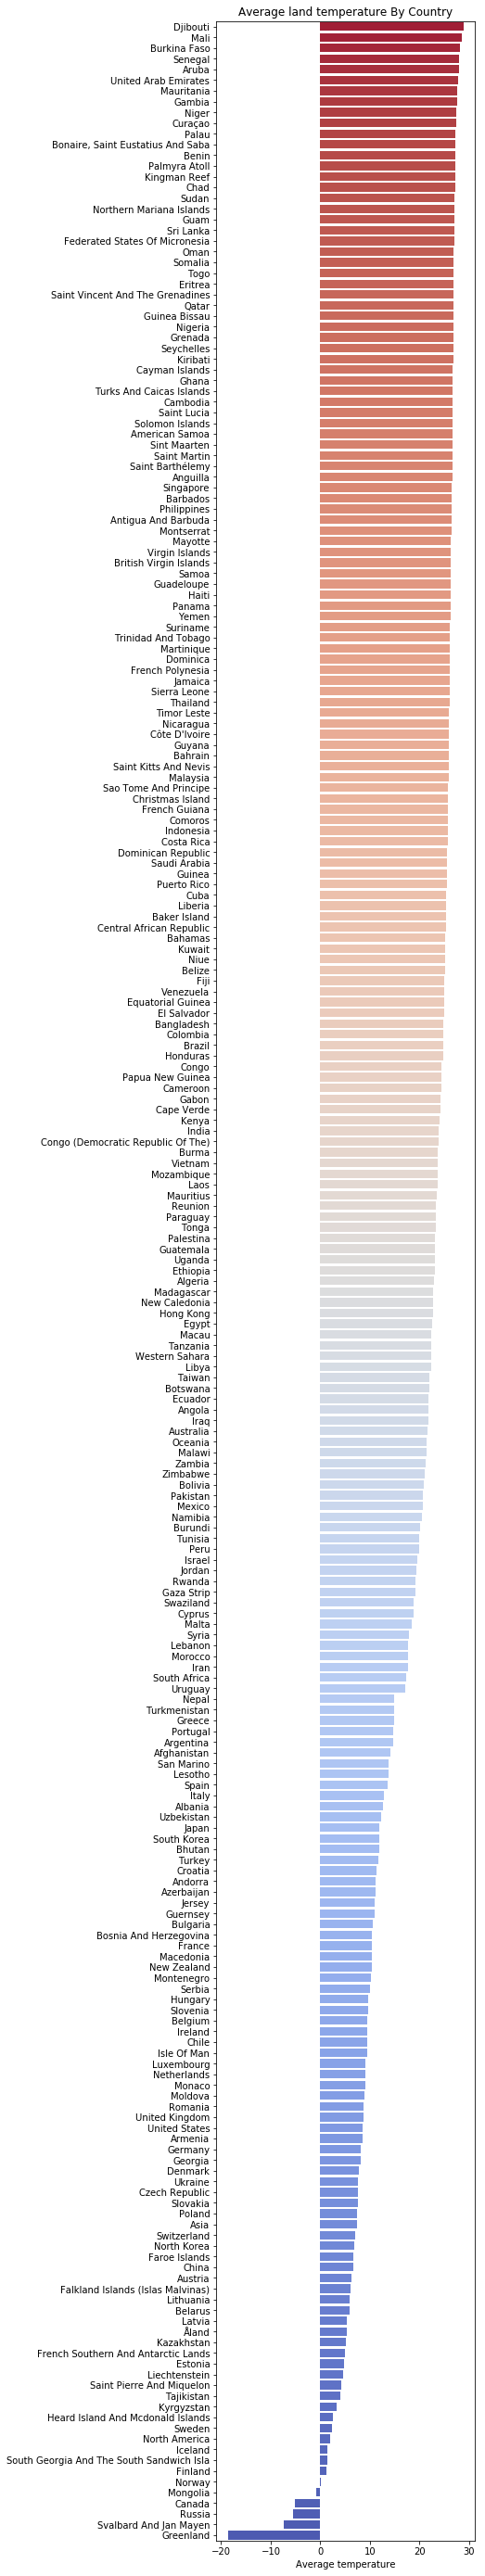

In [14]:
# This sorts the countries by their average temperatures and plots a graph to show this (alternative visual from map)

meantempbar, countriesbar = (list(x) for x in zip(*sorted(zip(meantemp, countries), reverse = True)))
                                                          
f, ax = plt.subplots(figsize=(5, 50))
colors = sns.color_palette('coolwarm', len(countries))
sns.barplot(meantempbar, countriesbar, palette = colors[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature By Country')

As we can see from the bar chart above the highest temperatures for countries appear to be around the equator with the greatest average temperature in Djibouti (Africa) and with the lowest temperatures being shown near the poles being Greenland.

__**Part 2 - Visualisation to show changes of temperature over time - Evidencing Global Warming**__

This section makes use of a different dataset from the Lawrence Berkeley National Laboratory in accordance with The Berkeley Earth Surface Temperature Study, in which it uses the monthly global average land temperature. This dataset has been shown to visualise as it shows a good example of the changes of temperature over time; something which is usually done to evidence and visualise the effects of climate change. 

In [15]:
# Extracts the data from the monthly global temperatures dataset

globaltemp = pd.read_csv("climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")

In [16]:
# Shows the data from the monthly global temperatures dataset

globaltemp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Extracts the year from the date within the dataset

years = np.unique(globaltemp['dt'].apply(lambda x: x[:4]))
meanworldtemp = []
meanworldtempuncertainty = []

In [18]:
# Calculates the average temperature for each year within the dataset 

for year in years:
    meanworldtemp.append(globaltemp[globaltemp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    meanworldtempuncertainty.append(globaltemp[globaltemp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

In [19]:
# Draws the scattergraph to show the average change in global temperature with time - evidencing the effects of global warming
    
trace0 = go.Scatter(
    x = years, 
    y = np.array(meanworldtemp) + np.array(meanworldtempuncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty Upper',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(meanworldtemp) - np.array(meanworldtempuncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty Lower',
    line=dict(
        color='rgb(0, 200, 220)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = meanworldtemp,
    name='Average Temperature',
    line=dict(
        color='rgb(112, 138, 144)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Temperature (°C)'),
    title='Change in Average Global Land Temperature Over Time',
    showlegend = True)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

As shown within the chart above there is a general trend that the average global land temperature has increased with time. This increase in temperature can be seen to be the greatest from the 1900-1950s with the largest increase being between the 1950s-2000s, this fits with what we expect as these were the times that nations began to develop (industrial revolution), with the early nations such as the United Kingdom and The United States of America in the 1900s-1950s with the emerging nations such as China, Russia and India within the 1950s-2000s and perhaps more so from the 2000s to the present day.
We could further analyse this data to see whether our hypothesis is correct regarding the countries development and whether this contributed to the changes within the average global land temperature contributing to larger amounts of CO2 and subsequently increasing the average land temperature.  